**Importing the Libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Importing the data from the csv**


In [24]:
df = pd.read_csv("Files/apartmentsPortugal.csv", index_col=0)


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88800 entries, 0 to 88799
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   URL           88800 non-null  object
 1   Titles        88800 non-null  object
 2   Price         88800 non-null  object
 3   Location      88800 non-null  object
 4   Rooms         88800 non-null  object
 5   Areas         88800 non-null  object
 6   Bathrooms     80532 non-null  object
 7   Listing Type  61076 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [26]:
df.head(5)

,URL,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type
0,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T4+1 com terraço na Estrela,890 000 €,"Estrela, Lisboa",T4,145 m²,2,Para recuperar
1,https://www.imovirtual.com/pt/anuncio/apartame...,"Apartamento T2 com terraço no Areeiro, Lisboa",365 000 €,"Areeiro, Lisboa",T2,48 m²,2,Usado
2,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T1 renovado e mobilado na Penha de...,299 900 €,"Penha de França, Lisboa",T1,51 m²,1,NaN
3,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T1+1 totalmente renovado em São Vi...,550 000 €,"São Vicente, Lisboa",T1,84 m²,2,NaN
4,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T3 com garagem e vista sobre o Rio...,725 000 €,"Campo de Ourique, Lisboa",T3,114 m²,2,Usado


**Data cleaning & manipulation**

In [27]:
#Separating the location to Neighborhood, city and state
location_split = df['Location'].str.rsplit(',', n=2, expand=True)
df['Neighborhood'] = location_split[0]
df['City'] = location_split[1]
df['State'] = location_split[2]

In [28]:
# Convert prices to float
df['Price'] = df['Price'].astype(str).str.replace('Preçosobconsulta', '').str.replace('€', '').str.replace(' ', '')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [29]:
#Convert the number of rooms to int
df['Rooms'] = df['Rooms'].str.extract('(\d+)', expand=False).astype(int)

In [30]:
#Convert the area to float
df['Areas'] = df['Areas'].str.replace(' ', '').str.replace('m²', '').str.replace(',', '.').astype(float)

In [31]:
#Convert the number of bathroom to integer
df['Bathrooms'] = df['Bathrooms'].fillna('0').replace('4 ou mais', '4').astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88800 entries, 0 to 88799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           88800 non-null  object 
 1   Titles        88800 non-null  object 
 2   Price         87553 non-null  float64
 3   Location      88800 non-null  object 
 4   Rooms         88800 non-null  int32  
 5   Areas         88800 non-null  float64
 6   Bathrooms     88800 non-null  int32  
 7   Listing Type  61076 non-null  object 
 8   Neighborhood  88800 non-null  object 
 9   City          88373 non-null  object 
 10  State         58610 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 7.5+ MB


In [33]:
df.head(5)

,URL,Titles,Price,Location,Rooms,Areas,Bathrooms,Listing Type,Neighborhood,City,State
0,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T4+1 com terraço na Estrela,890000.0,"Estrela, Lisboa",4,145.0,2,Para recuperar,Estrela,Lisboa,None
1,https://www.imovirtual.com/pt/anuncio/apartame...,"Apartamento T2 com terraço no Areeiro, Lisboa",365000.0,"Areeiro, Lisboa",2,48.0,2,Usado,Areeiro,Lisboa,None
2,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T1 renovado e mobilado na Penha de...,299900.0,"Penha de França, Lisboa",1,51.0,1,NaN,Penha de França,Lisboa,None
3,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T1+1 totalmente renovado em São Vi...,550000.0,"São Vicente, Lisboa",1,84.0,2,NaN,São Vicente,Lisboa,None
4,https://www.imovirtual.com/pt/anuncio/apartame...,Apartamento T3 com garagem e vista sobre o Rio...,725000.0,"Campo de Ourique, Lisboa",3,114.0,2,Usado,Campo de Ourique,Lisboa,None


**Data visualization**

Mean value:  388232.02701220976


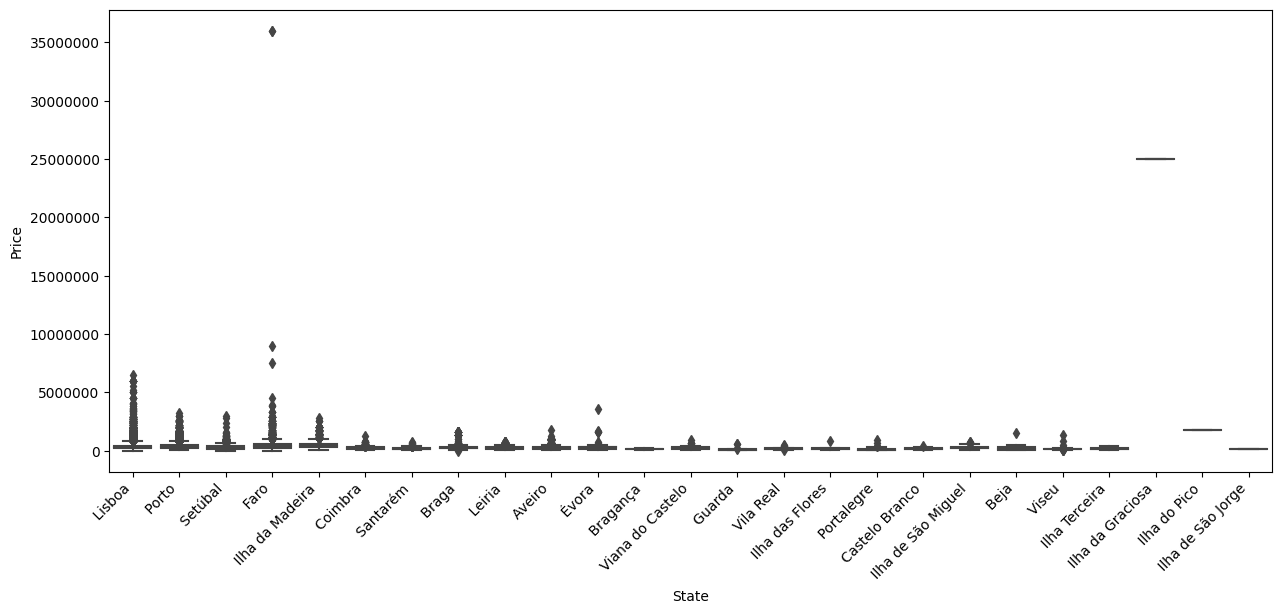

In [34]:
# Set the figure size
plt.figure(figsize=(15, 6))

sns.boxplot(data=df, x="State", y="Price")
plt.ticklabel_format(style='plain', axis='y')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

print("Mean value: ", df['Price'].mean())

<Axes: xlabel='Rooms', ylabel='count'>

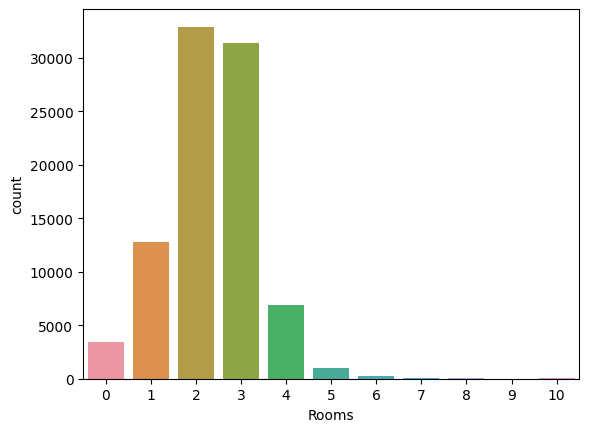

In [35]:
sns.countplot(data=df, x="Rooms")

<Axes: xlabel='Bathrooms', ylabel='count'>

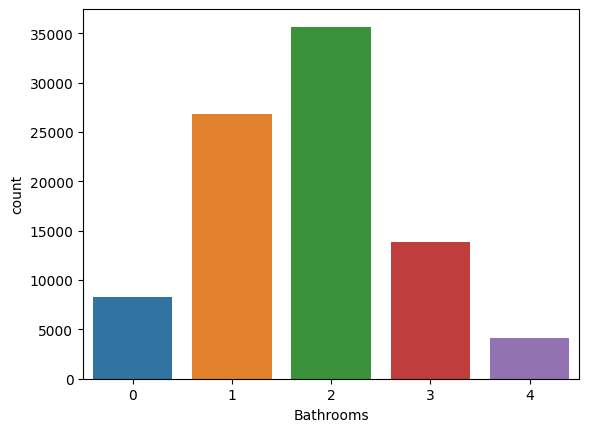

In [36]:
sns.countplot(data=df, x="Bathrooms")

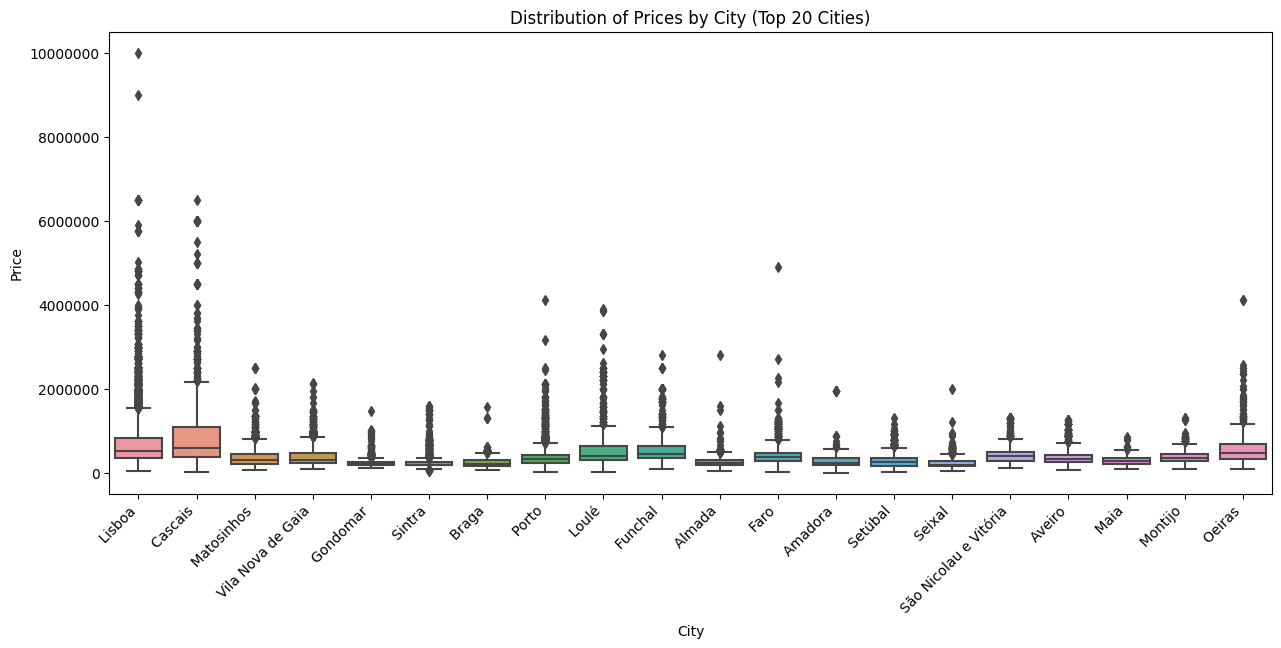

In [37]:
# Count the number of listings per city
city_counts = df['City'].value_counts()

# Select the top 20 cities with the most listings
top_cities = city_counts.head(20).index

# Filter the DataFrame to include only listings from the top cities
df_top_cities = df[df['City'].isin(top_cities)]

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the boxplot
sns.boxplot(data=df_top_cities, x="City", y="Price")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set the axis labels and title
plt.xlabel("City")
plt.ylabel("Price")
plt.title("Distribution of Prices by City (Top 20 Cities)")

# Show the plot
plt.show()

<Axes: xlabel='Price', ylabel='Count'>

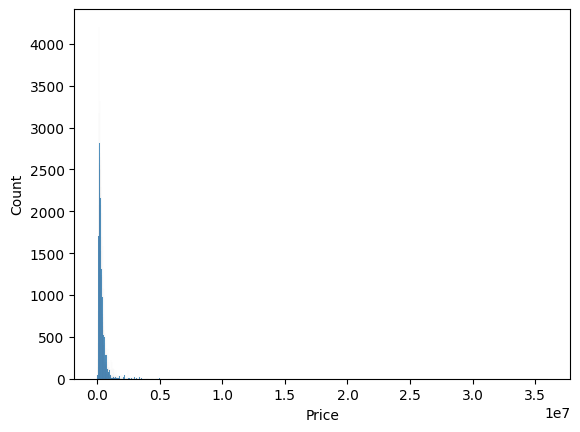

In [38]:
sns.histplot(data=df, x="Price")


<Axes: xlabel='Listing Type', ylabel='count'>

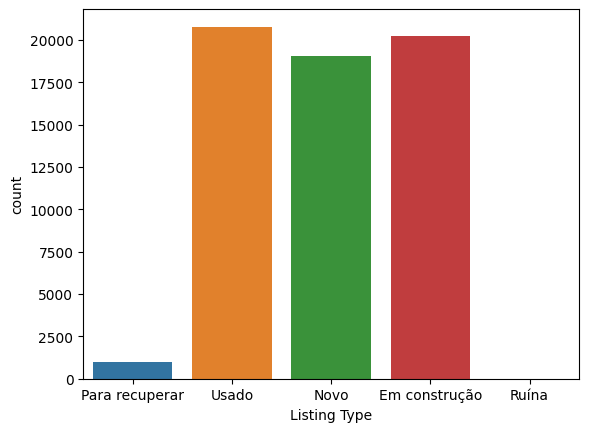

In [39]:
sns.countplot(data=df, x="Listing Type")

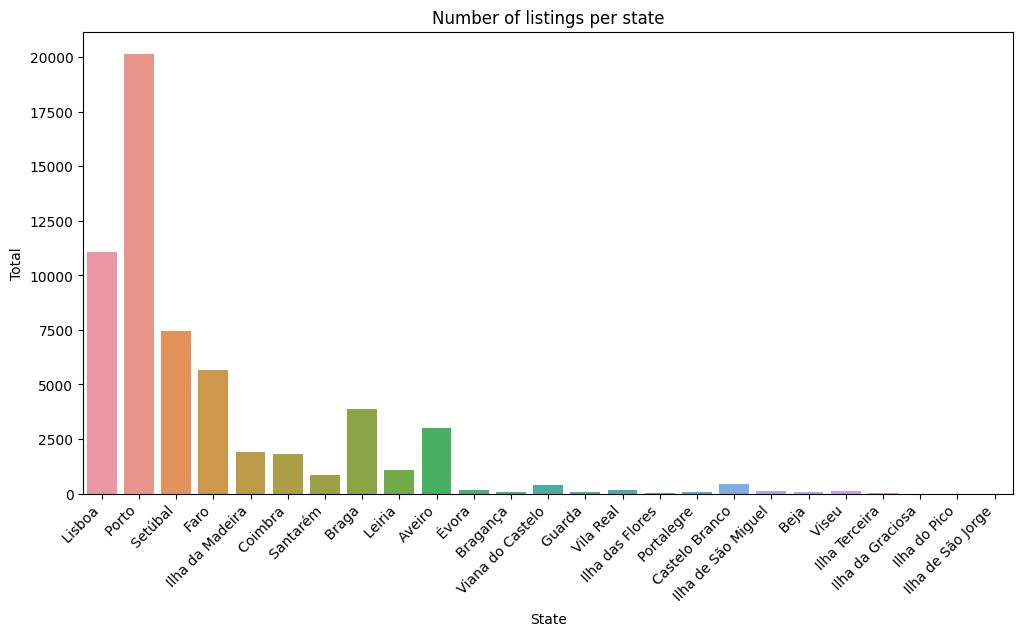

In [40]:
# Set the figure size
plt.figure(figsize=(12, 6))

sns.countplot(data=df, x="State")
# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

#Remove the scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Set the axis labels and title
plt.xlabel("State")
plt.ylabel("Total")
plt.title("Number of listings per state")

# Show the plot
plt.show()


<Axes: xlabel='Areas', ylabel='Price'>

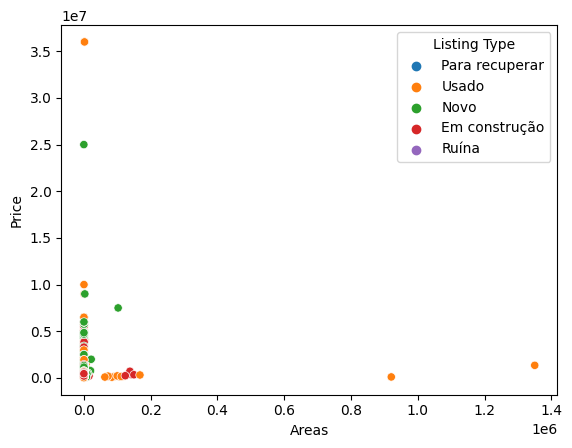

In [41]:
sns.scatterplot(data=df, x="Areas", y="Price", hue="Listing Type")

<Axes: xlabel='Rooms', ylabel='Price'>

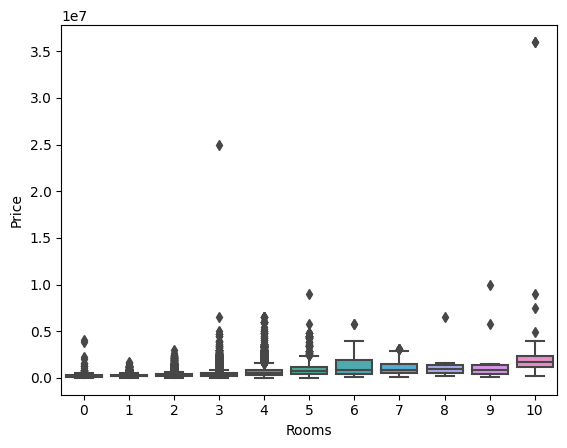

In [42]:
sns.boxplot(data=df, x="Rooms", y="Price")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88800 entries, 0 to 88799
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   URL           88800 non-null  object 
 1   Titles        88800 non-null  object 
 2   Price         87553 non-null  float64
 3   Location      88800 non-null  object 
 4   Rooms         88800 non-null  int32  
 5   Areas         88800 non-null  float64
 6   Bathrooms     88800 non-null  int32  
 7   Listing Type  61076 non-null  object 
 8   Neighborhood  88800 non-null  object 
 9   City          88373 non-null  object 
 10  State         58610 non-null  object 
dtypes: float64(2), int32(2), object(7)
memory usage: 7.5+ MB


In [44]:
df.to_csv("Files/data.csv")